In [ ]:
# 내 구글 드라이브에 연동
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
416/416 [==============================] - 1s 2ms/step - loss: 1.1077 - accuracy: 0.5464
Epoch 2/500
416/416 [==============================] - 1s 2ms/step - loss: 0.8863 - accuracy: 0.6952
Epoch 3/500
416/416 [==============================] - 1s 2ms/step - loss: 0.8566 - accuracy: 0.6884
Epoch 4/500
416/416 [==============================] - 1s 2ms/step - loss: 0.8392 - accuracy: 0.6943
Epoch 5/500
416/416 [==============================] - 1s 2ms/step - loss: 0.8245 - accuracy: 0.6995
Epoch 6/500
416/416 [==============================] - 1s 2ms/step - loss: 0.8114 - accuracy: 0.7067
Epoch 7/500
416/416 [===========================

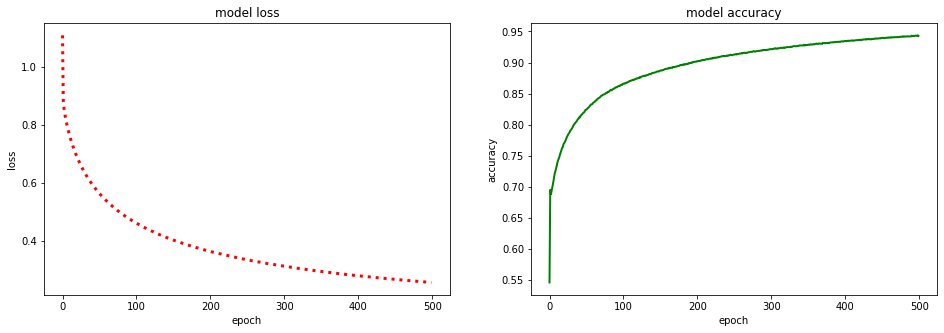




                             Gender        Age       Pace

                               Male         24        297


                                 **** Grade Prediction ****

     Prediction Result(One hot encoding)        ML Prediction          Real Result


[9.9965382e-01 3.4615406e-04 9.3967527e-09]    Outstanding(>25%)    Outstanding(>25%)



In [ ]:
# normalization
def normalization(record):
    r0 = record[0]
    r1 = record[1] / 10
    r2 = record[2] / 100
    return [r0, r1, r2]

# 만들어진 모델에 대해 train dataset의 loss, accuracy 를 그래프로 표현
def display_graph():
    plt.figure(figsize=(16,5))

    # 만들어진 모델에 대해 train dataset의 loss 를 그래프로 표현해 봅니다.
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], 'r:', linewidth=3)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')

    # 만들어진 모델에 대해 train dataset의 accuracy 를 그래프로 표현해 봅니다.
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], 'g-', linewidth=2)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    
    plt.show()
    
# pandas 를 불러옵니다.
import pandas as pd

# marathon_2015_2017_qualifying.csv 파일을 읽어와 marathon_2015_2017_qualifying DataFrame 을 생성합니다.
marathon_2015_2017_qualifying = pd.read_csv("gdrive/My Drive/MLDL/marathon_data/marathon_2015_2017_qualifying.csv")
# marathon_2015_2017_qualifying 에 "Grade" column 를 추가하고 1로 초기화 합니다.
marathon_2015_2017_qualifying["Grade"] = 1

# marathon_2015_2017_qualifying 의 "Official Time" column 에 대한 기본 통계정보를 가져와 statistics_2015_2017을 생성합니다.
statistics_2015_2017 = marathon_2015_2017_qualifying["Official Time"].describe()
# marathon_2015_2017_qualifying 에서 "Official Time"이 25% 보다 작은 row(행)의 "Grade" column 만 가져와 값을 0으로 변경합니다. 
marathon_2015_2017_qualifying.loc[marathon_2015_2017_qualifying["Official Time"] < statistics_2015_2017["25%"], "Grade"] = 0
# marathon_2015_2017_qualifying 에서 "Official Time"이 75% 보다 큰 row(행)의 "Grade" column 만 가져와 값을 2로 변경합니다. 
marathon_2015_2017_qualifying.loc[marathon_2015_2017_qualifying["Official Time"] > statistics_2015_2017["75%"], "Grade"] = 2

# 2015~2016년도 데이터만 가져와 marathon_2015_2016 DataFrame을 생성합니다.
marathon_2015_2016 = marathon_2015_2017_qualifying[marathon_2015_2017_qualifying['Year'] != 2017]
# 2017년도 데이터만 가져와 marathon_2017 DataFrame 생성합니다.
marathon_2017 = marathon_2015_2017_qualifying[marathon_2015_2017_qualifying['Year'] == 2017]

# marathon_2015_2016에서 'M/F', 'Age', 'Pace', 'Grade' column만 가져옵니다.
df_2015_2016 = pd.DataFrame(marathon_2015_2016,columns=['M/F',  'Age',  'Pace',  'Grade'])
# marathon_2017에서 'M/F', 'Age', 'Pace', 'Grade' column만 가져옵니다.
df_2017 = pd.DataFrame(marathon_2017,columns=['M/F',  'Age',  'Pace',  'Grade'])

# df_2015_2016 DataFrame을 리스트로 변환합니다.
record_2015_2016 = df_2015_2016.values.tolist()
# df_2017 DataFrame을 리스트로 변환합니다.
record_2017 = df_2017.values.tolist()

nb_classes = 3  # 0 ~ 2(분류 클래스의 종류)
grade_list = ['Outstanding(>25%)', 'Average(25~75%)', 'Below(<75%)']

# gender_list 정의
gender_list = ['Female', 'Male']

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

t_t = 500   # training 횟수(epoch)
t_r = 0.01   # learning rate
t_s = 1       # 등수
        
# train dataset 정의
x_train = [normalization(r[0:3]) for r in record_2015_2016]
y_train = [[r[-1]] for r in record_2015_2016]

# test dataset 정의
x_test = [normalization(r[0:3]) for r in record_2017]
y_test = [[r[-1]] for r in record_2017]

# 모델 구성하기
model =  tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(nb_classes, input_shape=(3,), activation='softmax'))
# 모델 학습과정 설정하기
sgd = tf.keras.optimizers.SGD(lr=t_r)
model.compile(loss='categorical_crossentropy', 
                  optimizer=sgd,
                  metrics=['accuracy'])

# 모델 구성 확인하기
model.summary()

# to_categorical 함수를 통해 label 을 One hot 구조로 변경(One hot encoding)
y_one_hot = tf.keras.utils.to_categorical(y_train)

# 모델 학습시키기
history = model.fit(np.array(x_train), np.array(y_one_hot), epochs=t_t, batch_size=128)

# 그래프 출력
display_graph()

# 예측하기
runner = x_test[t_s-1]
pre_result = model.predict(np.array([runner]))  # pre_result 에는 One hot encoding 형식으로 결과가 들어있음
grade = np.argmax(pre_result)  # argmax 함수를 사용해 One hot encoding 형식의 결과값 중 가장 큰 값의 index 를 반환

# 예측 결과 출력
print('\n\n')
print("%35s %10s %10s" % ('Gender', 'Age', 'Pace')+'\n')
print("%35s %10s %10s" % (gender_list[record_2017[t_s-1][0]], str(record_2017[t_s-1][1]), str(record_2017[t_s-1][2]))+'\n\n')
print("%60s" % ('**** Grade Prediction ****\n'))
print("%40s %20s %20s" % ('Prediction Result(One hot encoding)', 'ML Prediction', 'Real Result')+'\n\n')
print("%40s %20s %20s" % (pre_result[0], grade_list[grade], grade_list[y_test[t_s-1][0]])+'\n')

In [ ]:
t_s = 3000  # 등수

# test dataset 으로 예측
runner = x_test[t_s-1]
pre_result = model.predict(np.array([runner]))  # pre_result 에는 One hot encoding 형식으로 결과가 들어있음, [1,0,0]=0 또는 [0,1,0]=1 또는 [0,0,1]=2
grade = np.argmax(pre_result)  # argmax 함수를 사용해 One hot encoding 형식의 결과값 중 가장 큰 값의 index 를 반환

# 예측 결과 출력
print('\n\n')
print("%35s %10s %10s" % ('Gender', 'Age', 'Pace')+'\n')
print("%35s %10s %10s" % (gender_list[record_2017[t_s-1][0]], str(record_2017[t_s-1][1]), str(record_2017[t_s-1][2]))+'\n\n')
print("%60s" % ('**** Grade Prediction ****\n'))
print("%40s %20s %20s" % ('Prediction Result(One hot encoding)', 'ML Prediction', 'Real Result')+'\n\n')
print("%40s %20s %20s" % (pre_result[0], grade_list[grade], grade_list[y_test[t_s-1][0]])+'\n')




                             Gender        Age       Pace

                             Female         27        438


                                 **** Grade Prediction ****

     Prediction Result(One hot encoding)        ML Prediction          Real Result


      [0.63120115 0.3672579  0.00154092]    Outstanding(>25%)    Outstanding(>25%)

